In [1]:
import pandas as pd

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,likes,Checkins,Returns,Category,commBase,comm24,comm48,comm24_1,diff2448,baseTime,...,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463.0,1.0,0.0,0,0.0,0,0,65,...,0,0,0,0.0,0,0,0,0,1,0
1,634995,0,463.0,1.0,0.0,0,0.0,0,0,10,...,0,0,0,0.0,0,0,0,1,0,0
2,634995,0,463.0,1.0,0.0,0,0.0,0,0,14,...,1,0,0,0.0,0,0,0,0,1,0
3,634995,0,463.0,1.0,7.0,0,3.0,7,-3,62,...,1,0,0,1.0,0,0,0,0,0,0
4,634995,0,463.0,1.0,1.0,0,0.0,1,0,58,...,0,0,0,0.0,0,1,0,0,0,0


In [2]:
# Check for missing values and basic statistics
missing_values = data.isnull().sum()
data_summary = data.describe()

missing_values, data_summary


(likes          0
 Checkins       0
 Returns       51
 Category      57
 commBase      60
 comm24         0
 comm48        48
 comm24_1       0
 diff2448       0
 baseTime       0
 length         0
 shares      2449
 hrs            0
 sun_pub        0
 mon_pub     1927
 tue_pub        0
 wed_pub        0
 thu_pub     3045
 fri_pub        0
 sat_pub        0
 sun_base       0
 mon_base    1970
 tue_base       0
 wed_base       0
 thu_base       0
 fri_base       0
 sat_base       0
 output         0
 dtype: int64,
               likes       Checkins       Returns      Category      commBase  \
 count  4.094900e+04   40949.000000  4.089800e+04  40892.000000  40889.000000   
 mean   1.313814e+06    4676.133752  4.485611e+04     24.272449     55.793783   
 std    6.785752e+06   20593.184863  1.109917e+05     19.950812    137.062715   
 min    3.600000e+01       0.000000  0.000000e+00      1.000000      0.000000   
 25%    3.673400e+04       0.000000  7.010000e+02      9.000000      2.00000

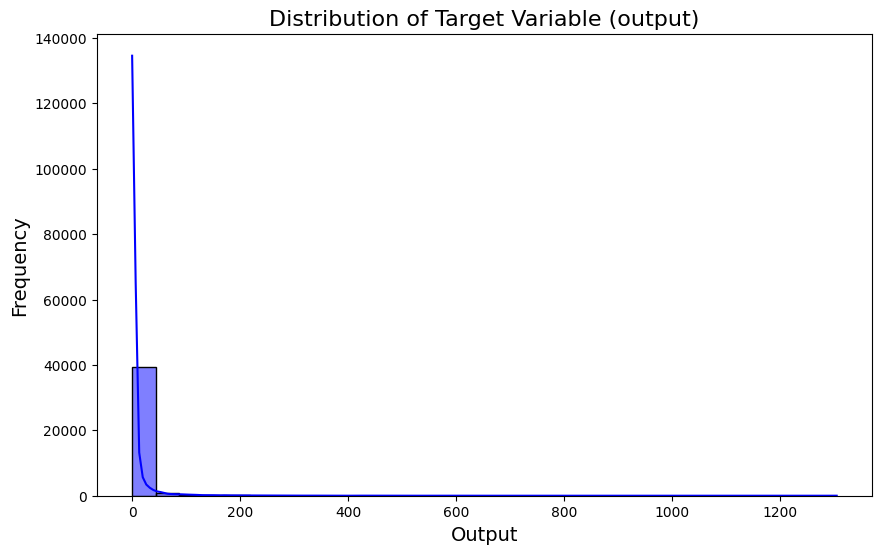

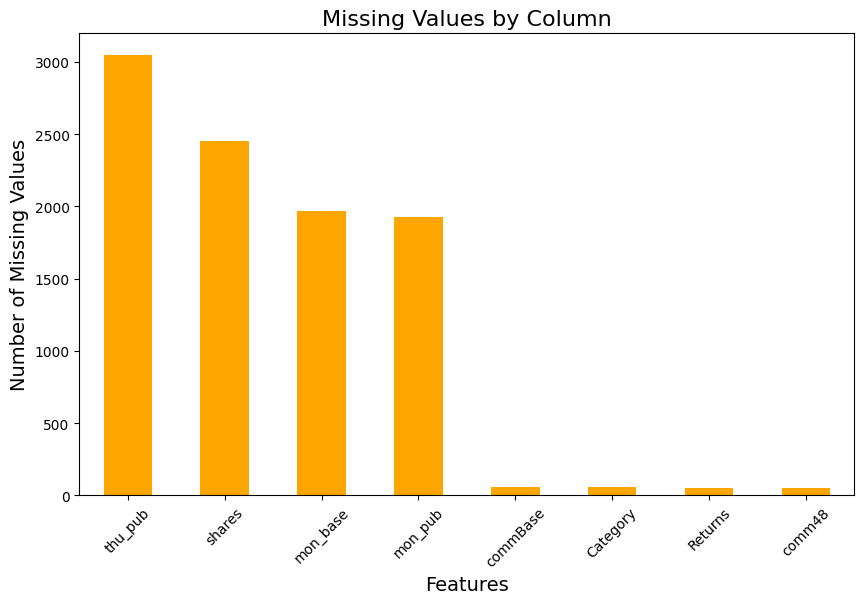

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'output'
plt.figure(figsize=(10, 6))
sns.histplot(data['output'], bins=30, kde=True, color='blue')
plt.title('Distribution of Target Variable (output)', fontsize=16)
plt.xlabel('Output', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Count and visualize the missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Missing Values by Column', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [4]:
# Handle missing values

# Impute numerical columns with the median
numerical_columns = ['Returns', 'Category', 'commBase', 'comm48', 'mon_base']
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Drop columns with excessive missing values
data = data.drop(columns=['shares', 'mon_pub', 'thu_pub'])

# Verify missing values are addressed
remaining_missing = data.isnull().sum()

remaining_missing


likes       0
Checkins    0
Returns     0
Category    0
commBase    0
comm24      0
comm48      0
comm24_1    0
diff2448    0
baseTime    0
length      0
hrs         0
sun_pub     0
tue_pub     0
wed_pub     0
fri_pub     0
sat_pub     0
sun_base    0
mon_base    0
tue_base    0
wed_base    0
thu_base    0
fri_base    0
sat_base    0
output      0
dtype: int64

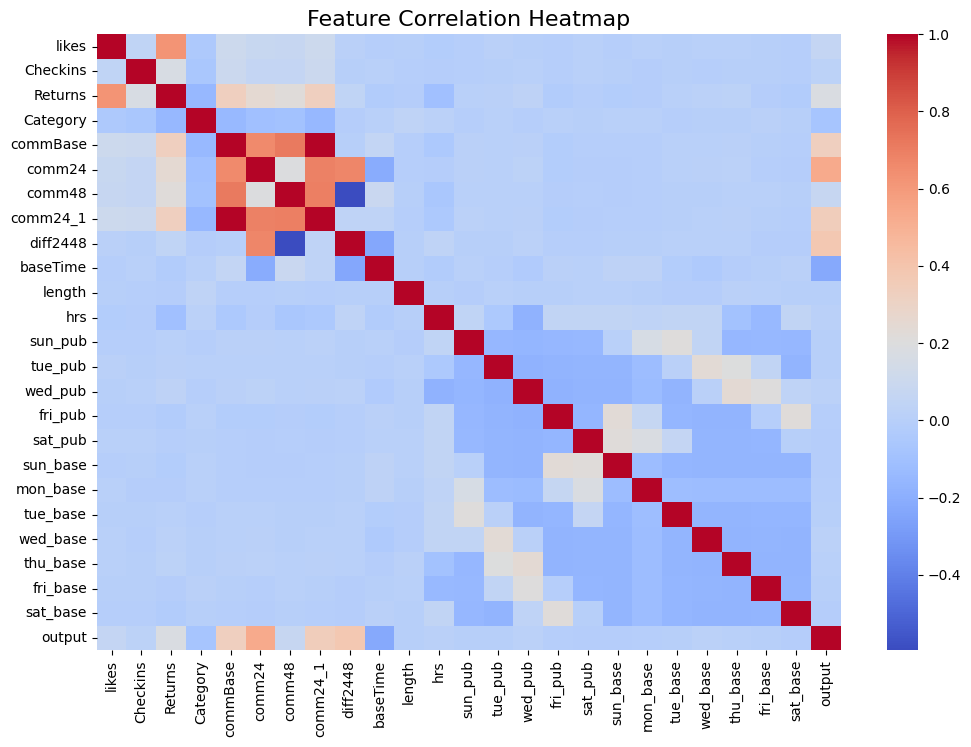

Correlation with Target Variable:
 output      1.000000
comm24      0.528696
diff2448    0.378453
comm24_1    0.341741
commBase    0.326878
Returns     0.177319
comm48      0.072089
likes       0.058918
Checkins    0.022982
wed_pub     0.021169
wed_base    0.017299
hrs         0.012584
thu_base    0.007104
sun_pub     0.001449
tue_pub     0.001263
tue_base   -0.000131
length     -0.000622
fri_base   -0.001383
fri_pub    -0.005043
mon_base   -0.007148
sat_base   -0.010611
sat_pub    -0.012229
sun_base   -0.012447
Category   -0.073742
baseTime   -0.221962
Name: output, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

# Focus on correlation with the target variable
target_corr = correlation_matrix['output'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", target_corr)


In [6]:
from sklearn.preprocessing import StandardScaler

# Drop features with low correlation or multicollinearity
features_to_drop = []  # Add column names based on your analysis
data = data.drop(columns=features_to_drop)

# Separate features and target
X = data.drop(columns=['output'])
y = data['output']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for readability
X = pd.DataFrame(X_scaled, columns=X.columns)


In [7]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (32759, 24)
Test set size: (8190, 24)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 4.340433196697482
R² Score: 0.6017508142518111


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "R²": r2}

# Display results
for model, metrics in results.items():
    print(f"{model}:\n  MAE: {metrics['MAE']:.2f}\n  R²: {metrics['R²']:.2f}\n")


Linear Regression:
  MAE: 7.84
  R²: 0.34

Decision Tree:
  MAE: 5.99
  R²: -0.06

Gradient Boosting:
  MAE: 4.42
  R²: 0.66



In [10]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize additional models
models["Random Forest"] = RandomForestRegressor(random_state=42)
models["XGBoost"] = XGBRegressor(random_state=42, verbosity=0)

# Train and evaluate each new model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "R²": r2}

# Display results for all models
for model, metrics in results.items():
    print(f"{model}:\n  MAE: {metrics['MAE']:.2f}\n  R²: {metrics['R²']:.2f}\n")


Linear Regression:
  MAE: 7.84
  R²: 0.34

Decision Tree:
  MAE: 5.99
  R²: -0.06

Gradient Boosting:
  MAE: 4.42
  R²: 0.66

Random Forest:
  MAE: 4.34
  R²: 0.60

XGBoost:
  MAE: 4.35
  R²: 0.62



In [12]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}


In [13]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,
    random_state=42,
    scoring='r2',
    verbose=1
)
random_search.fit(X_train, y_train)


c:\Users\pater\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2', verbose=1)

In [19]:
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


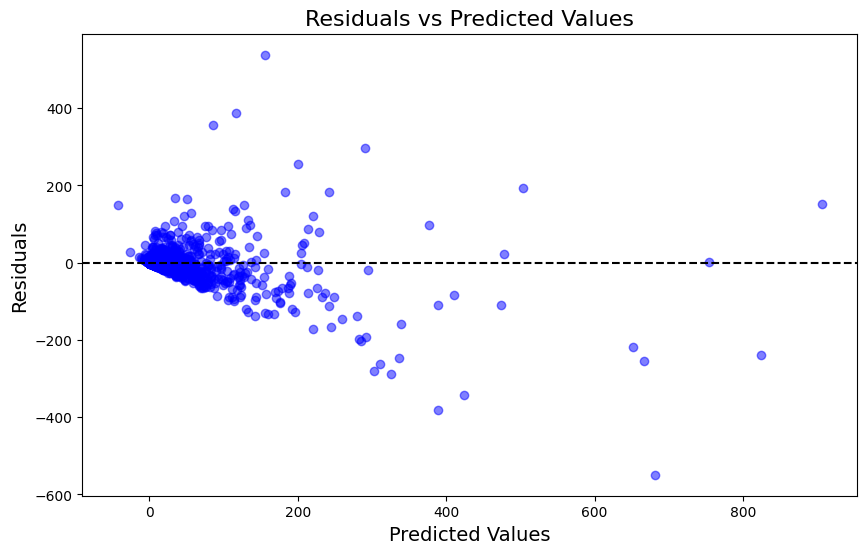

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE scores: {-scores}")
print(f"Mean MAE across folds: {-scores.mean()}")


Cross-validation MAE scores: [5.39798999 4.61201511 4.06109243 6.00278842 4.76122918]
Mean MAE across folds: 4.967023026768246


In [23]:
# Assuming 'commBase', 'comm24', 'comm48' are related to comments or interactions
X['engagement'] = X['likes'] + X['commBase'] + X['comm24'] + X['comm48']


In [22]:
print(X.columns)


Index(['likes', 'Checkins', 'Returns', 'Category', 'commBase', 'comm24',
       'comm48', 'comm24_1', 'diff2448', 'baseTime', 'length', 'hrs',
       'sun_pub', 'tue_pub', 'wed_pub', 'fri_pub', 'sat_pub', 'sun_base',
       'mon_base', 'tue_base', 'wed_base', 'thu_base', 'fri_base', 'sat_base'],
      dtype='object')


In [24]:
# Calculate total publishing time in hours (if 'baseTime' represents hours or a timestamp)
X['time_engagement'] = X['baseTime'] * X['hrs']  # Adjust depending on what these columns represent


In [25]:
# If 'Category' is categorical, you might want to encode it using OneHotEncoding or LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Category'] = le.fit_transform(X['Category'])


In [26]:
# Create a feature that sums up the activity for the week
X['weekly_engagement'] = X['sun_pub'] + X['tue_pub'] + X['wed_pub'] + X['fri_pub'] + X['sat_pub']


In [27]:
# This could represent the difference in comment activity over time
X['comment_diff'] = X['diff2448']


In [28]:
# Create 'engagement' based on likes and comments
X['engagement'] = X['likes'] + X['commBase'] + X['comm24'] + X['comm48']

# Calculate interaction with time
X['time_engagement'] = X['baseTime'] * X['hrs']

# Encode 'Category' if it's categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Category'] = le.fit_transform(X['Category'])

# Create a weekly engagement score based on day-based columns
X['weekly_engagement'] = X['sun_pub'] + X['tue_pub'] + X['wed_pub'] + X['fri_pub'] + X['sat_pub']

# Difference in comments over time
X['comment_diff'] = X['diff2448']

# Check the updated columns
print(X.columns)


Index(['likes', 'Checkins', 'Returns', 'Category', 'commBase', 'comm24',
       'comm48', 'comm24_1', 'diff2448', 'baseTime', 'length', 'hrs',
       'sun_pub', 'tue_pub', 'wed_pub', 'fri_pub', 'sat_pub', 'sun_base',
       'mon_base', 'tue_base', 'wed_base', 'thu_base', 'fri_base', 'sat_base',
       'engagement', 'time_engagement', 'weekly_engagement', 'comment_diff'],
      dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and evaluate its performance
best_model_random = random_search.best_estimator_

y_pred = best_model_random.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Optimized MAE: {mae}")
print(f"Optimized R²: {r2}")


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}
Optimized MAE: 4.449174258857767
Optimized R²: 0.6405664258959892


In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R²: {r2_xgb}")


XGBoost MAE: 4.3527573775724075
XGBoost R²: 0.622954152381054


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid for XGBoost
xgb_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
xgb_random_search.fit(X_train, y_train)

# Get the best model and evaluate it
best_xgb_model = xgb_random_search.best_estimator_

y_pred_xgb_opt = best_xgb_model.predict(X_test)
mae_xgb_opt = mean_absolute_error(y_test, y_pred_xgb_opt)
r2_xgb_opt = r2_score(y_test, y_pred_xgb_opt)

print(f"Best XGBoost Hyperparameters: {xgb_random_search.best_params_}")
print(f"Optimized XGBoost MAE: {mae_xgb_opt}")
print(f"Optimized XGBoost R²: {r2_xgb_opt}")


Best XGBoost Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}
Optimized XGBoost MAE: 4.379297164548302
Optimized XGBoost R²: 0.664674694303686


In [36]:
from sklearn.model_selection import cross_val_score

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE scores: {-xgb_cv_scores}")
print(f"Mean MAE across folds: {-xgb_cv_scores.mean()}")


Cross-validation MAE scores: [5.31478627 4.47375624 4.16684652 4.78659576 4.55325461]
Mean MAE across folds: 4.659047876859978


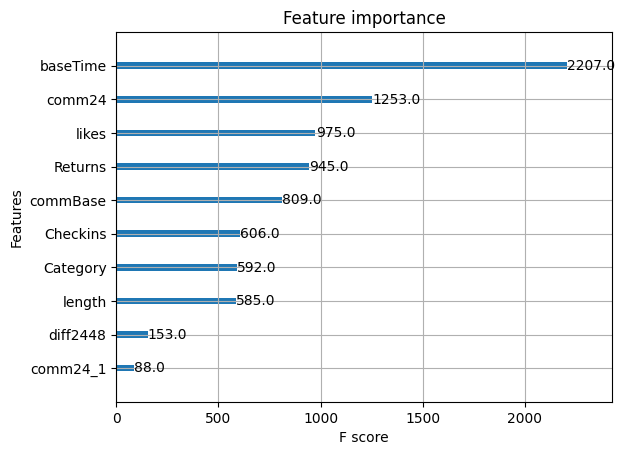

In [37]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(best_xgb_model, importance_type='weight', max_num_features=10)
plt.show()


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the results
print(f"Cross-validation MAE scores: {-gb_cv_scores}")
print(f"Mean MAE across folds: {-gb_cv_scores.mean()}")


Cross-validation MAE scores: [5.3859079  4.54099011 4.1594772  5.55733304 4.67907817]
Mean MAE across folds: 4.864557283811737


In [39]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the results
print(f"Cross-validation MAE scores: {-xgb_cv_scores}")
print(f"Mean MAE across folds: {-xgb_cv_scores.mean()}")


Cross-validation MAE scores: [5.96166476 4.87566144 4.34536999 5.35496056 4.9870255 ]
Mean MAE across folds: 5.104936451489399


In [40]:
# Import the Gradient Boosting model with best hyperparameters
from sklearn.ensemble import GradientBoostingRegressor

# Use the best parameters from RandomizedSearchCV or GridSearchCV
best_params = {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}

# Initialize the Gradient Boosting model with the best hyperparameters
final_gb_model = GradientBoostingRegressor(**best_params, random_state=42)

# Train the model on the full training data
final_gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = final_gb_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final MAE: {mae}")
print(f"Final R²: {r2}")


Final MAE: 4.449174258857767
Final R²: 0.6405664258959892


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (24,) and arg 3 with shape (28,).

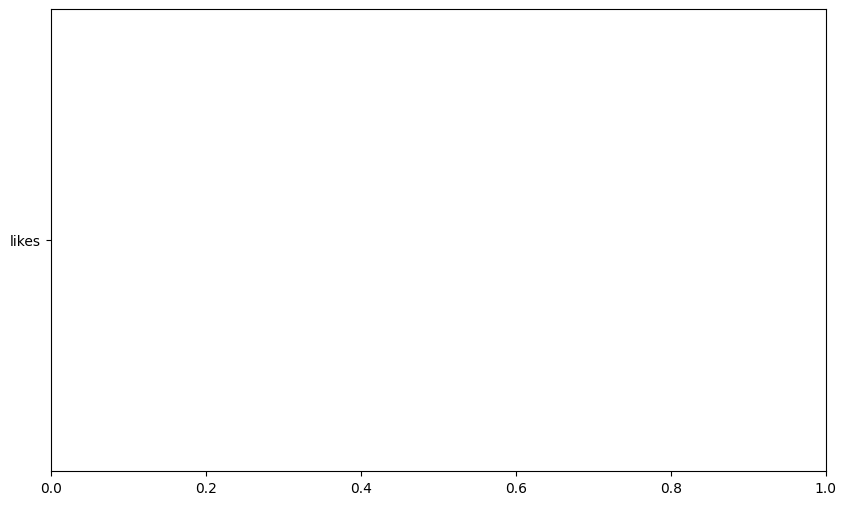

In [41]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, final_gb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting')
plt.show()


In [42]:
print("Number of features in X:", len(X.columns))
print("Number of feature importances:", len(final_gb_model.feature_importances_))


Number of features in X: 28
Number of feature importances: 24


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (24,) and arg 3 with shape (28,).

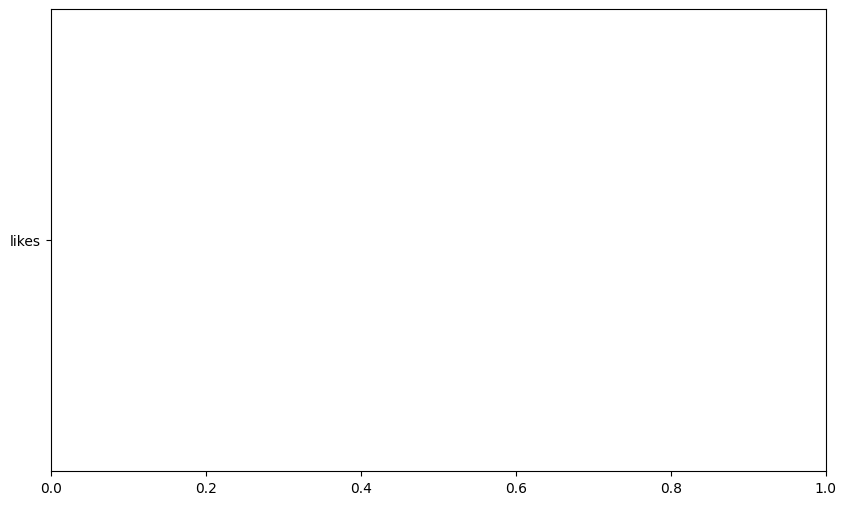

In [43]:
# If X is a dataframe with feature names and the model was trained on those features, use X.columns
# Otherwise, adjust based on the features used to train the model

import matplotlib.pyplot as plt

# Make sure the length of X.columns matches the number of features the model was trained on
if len(X.columns) == len(final_gb_model.feature_importances_):
    feature_importance = final_gb_model.feature_importances_
else:
    # If there's a mismatch, ensure that you're using the right features
    feature_importance = final_gb_model.feature_importances_[:len(X.columns)]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting')
plt.show()


In [44]:
# Check the shape of your dataset used for training
print(f"Shape of training data: {X_train.shape}")
print(f"Feature names in training data: {X_train.columns}")


Shape of training data: (32759, 24)
Feature names in training data: Index(['likes', 'Checkins', 'Returns', 'Category', 'commBase', 'comm24',
       'comm48', 'comm24_1', 'diff2448', 'baseTime', 'length', 'hrs',
       'sun_pub', 'tue_pub', 'wed_pub', 'fri_pub', 'sat_pub', 'sun_base',
       'mon_base', 'tue_base', 'wed_base', 'thu_base', 'fri_base', 'sat_base'],
      dtype='object')


In [46]:
from sklearn.preprocessing import OneHotEncoder

# Use the correct syntax for newer versions of scikit-learn
encoder = OneHotEncoder(sparse_output=False)  # This is the updated argument in recent scikit-learn versions

# Assuming you have a categorical column in X_train
encoded_X = encoder.fit_transform(X_train[['categorical_column']])  # Replace with your actual column name
encoded_columns = encoder.get_feature_names_out(['categorical_column'])  # Get the encoded column names

print(f"Encoded columns: {encoded_columns}")


KeyError: "None of [Index(['categorical_column'], dtype='object')] are in the [columns]"